# Credit Card Fraud Detection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [4]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


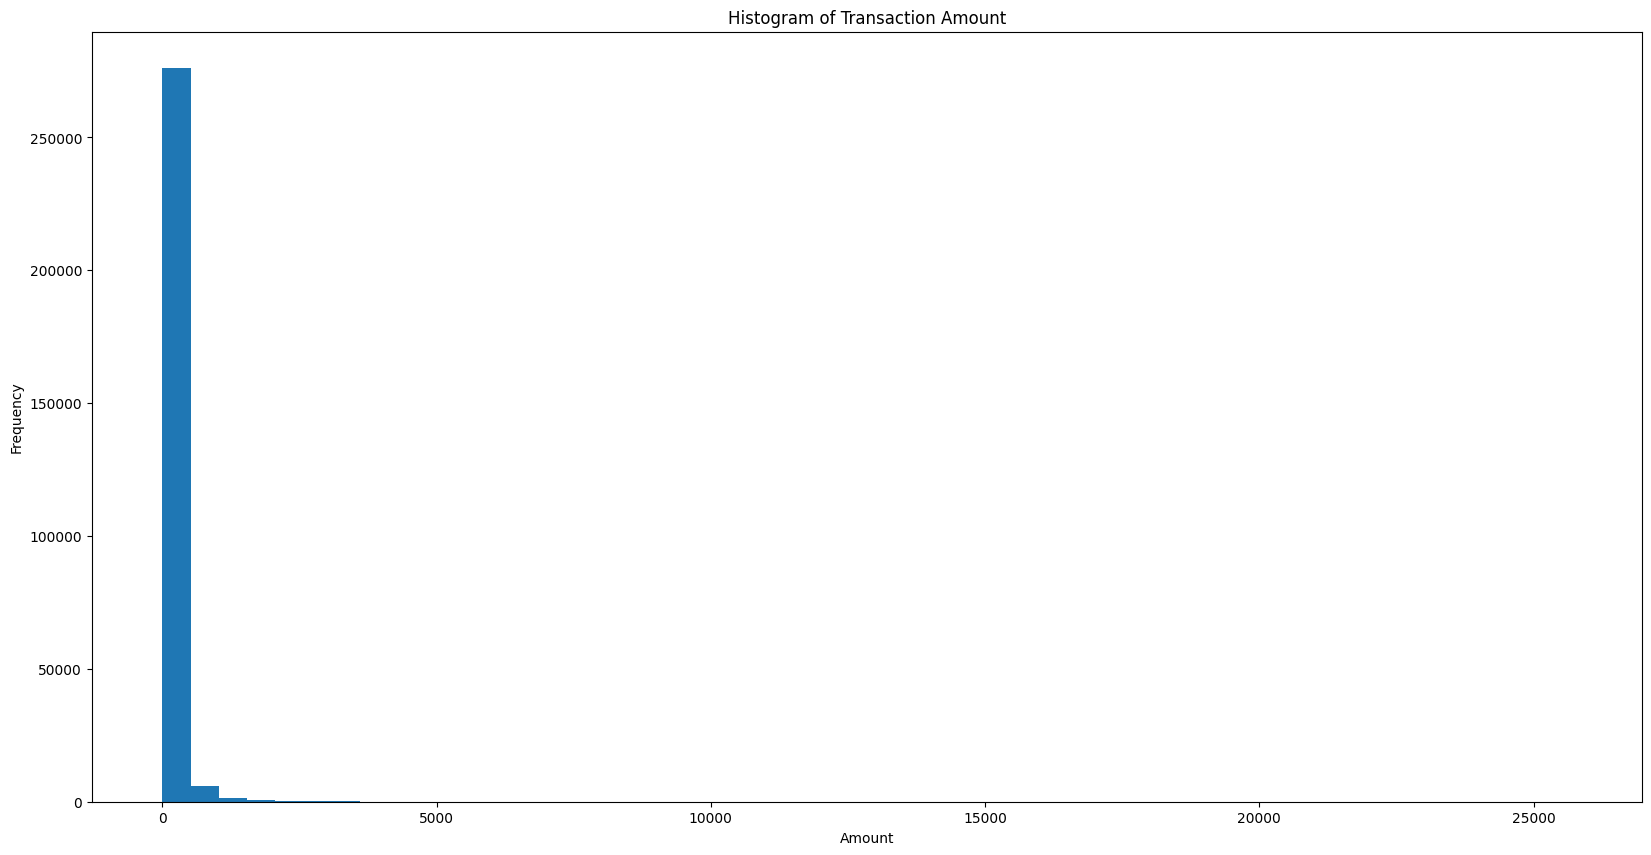

In [5]:
plt.hist(df['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount')
plt.show()


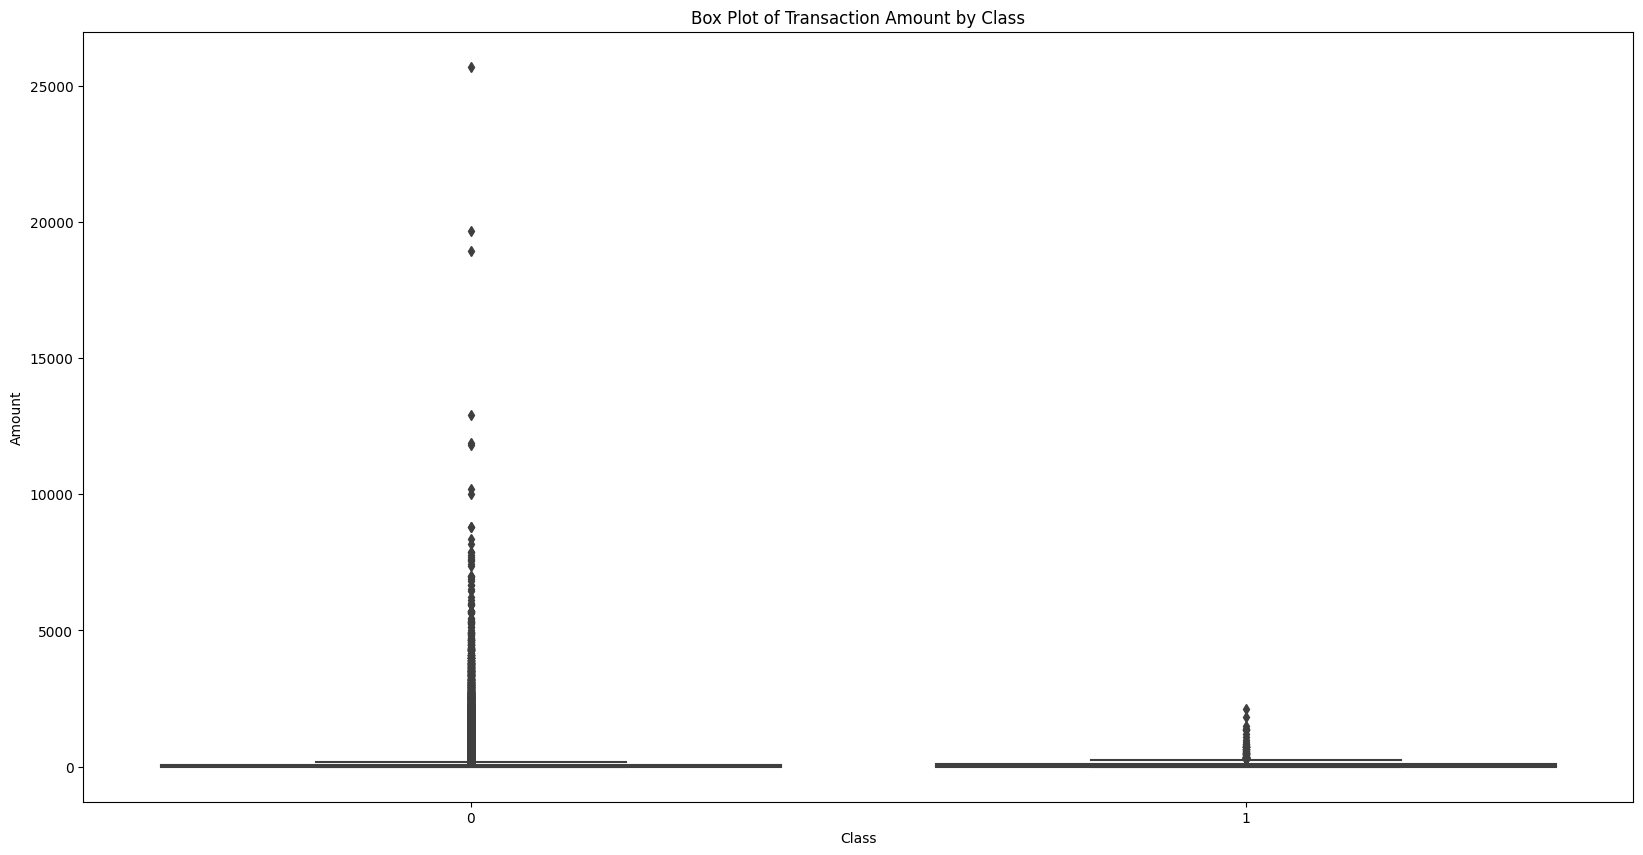

In [6]:
sns.boxplot(x = 'Class', y ='Amount' , data = df)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Box Plot of Transaction Amount by Class')
plt.show()

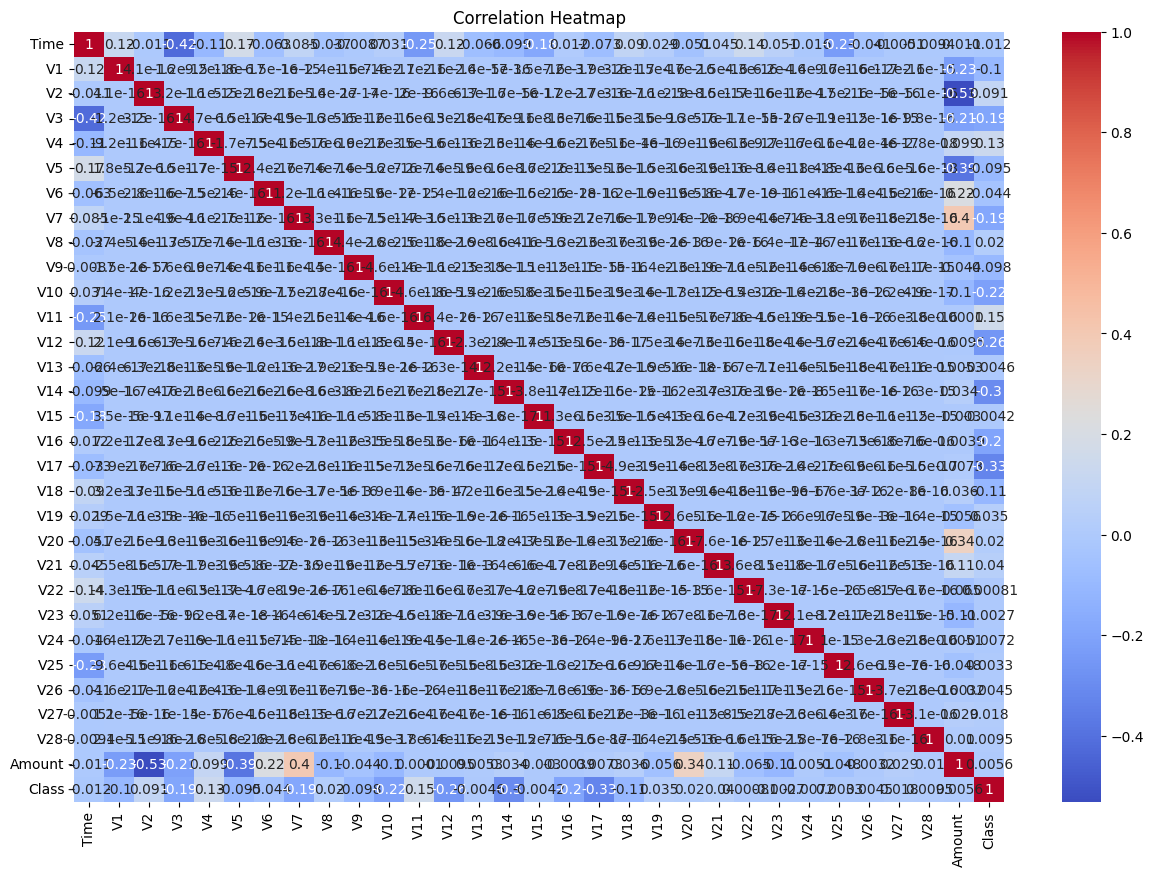

In [7]:
corr = df.corr()
matplotlib.rcParams["figure.figsize"]=(15,10)
sns.heatmap(corr, cmap ='coolwarm', annot = True)
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
median = df['Amount'].median()
min_value = df['Amount'].min()
max_value = df['Amount'].max()

print('Median:', median)
print('IQR:', IQR)
print('Minimum:', min_value)
print('Maximum:', max_value)

Median: 16.0
IQR: 71.565
Minimum: 0.0
Maximum: 184.5


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Amount','Time']]= scaler.fit_transform(df[['Amount','Time']])
print(df[['Amount', 'Time']])

          Amount      Time
0       0.810949  0.000000
1       0.014580  0.000000
3       0.669377  0.000006
4       0.379350  0.000012
5       0.019892  0.000012
...          ...       ...
284801  0.014580  0.999983
284802  0.004173  0.999988
284803  0.134363  0.999994
284804  0.367913  1.000000
284805  0.054201  1.000000

[252903 rows x 2 columns]


## Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Class', axis =1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train



260291    0
142877    0
179123    0
156743    0
184305    0
         ..
135732    0
117935    0
148895    0
164985    0
138040    0
Name: Class, Length: 202322, dtype: int64

In [13]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
260291,0.922992,2.008678,-0.417842,-0.680107,0.360350,-0.242482,-0.023237,-0.510269,0.020606,1.155425,...,-0.149377,-0.257353,-0.670293,0.269757,-1.090587,-0.465835,0.044733,-0.015994,-0.045938,0.162547
142877,0.491886,-3.019125,3.676753,-1.665704,0.456419,-0.807676,-1.397271,0.164419,0.830868,0.948286,...,1.084965,-0.163536,0.559295,0.190264,0.383593,-0.231729,-0.508051,-0.059086,-0.649342,0.009702
179123,0.717243,2.109657,0.521720,-3.470093,0.469621,1.471653,-1.005073,0.604578,-0.211299,0.042212,...,-0.194453,-0.077397,-0.124418,-0.114196,-0.121005,0.403125,0.705635,-0.096363,-0.032713,0.004119
156743,0.629893,-0.501650,0.528513,0.928346,-1.256275,2.659054,4.175553,-0.124988,0.844914,1.362456,...,0.136523,-0.312409,-0.561977,-0.267003,0.597666,0.301067,-0.706981,-0.060370,-0.152430,0.008184
184305,0.730305,1.920395,-0.675053,-0.956858,-0.387362,-0.696090,-1.067888,-0.113260,-0.238384,1.230176,...,-0.108463,0.354253,1.394160,-0.094750,0.718779,0.239138,1.004214,-0.073988,-0.075201,0.243902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135732,0.470964,-1.945611,1.645678,-0.063891,1.716029,-1.395291,-1.057649,-0.532792,1.148104,-0.554903,...,-0.123091,0.182157,0.258846,0.003427,0.698181,0.010753,-0.145296,-0.164749,-0.038597,0.183252
117935,0.433352,1.346465,-0.500611,0.624692,-0.705316,-0.948892,-0.476496,-0.675131,-0.082215,-0.812790,...,0.110134,0.147230,0.401925,0.031926,0.116531,0.316709,-0.256962,0.036784,0.021013,0.086721
148895,0.522583,0.116804,1.124966,-0.189357,-0.411574,1.179856,-0.677778,1.114330,-0.460061,1.417527,...,0.049699,-0.532265,-0.991069,0.079980,0.418580,-0.452823,0.039088,-0.097230,-0.151803,0.048726
164985,0.677854,-0.348972,0.457716,1.467516,-0.683567,0.106562,0.005166,0.242253,0.133368,0.345197,...,-0.059041,0.240587,0.777556,-0.177885,0.789717,-0.365805,0.501540,0.119394,0.165962,0.062331


## Handling Class Imbalance

###### Oversampling with SMOTE
###### Ensemble methods using Random Forest

In [14]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Model Selection

#### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


In [17]:
logistic_regression =LogisticRegression(random_state = 42)
logistic_regression.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42)

In [18]:
y_pred_lr = logistic_regression.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred_lr))
print("AUC: " , roc_auc_score(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50490
           1       0.08      0.92      0.15        91

    accuracy                           0.98     50581
   macro avg       0.54      0.95      0.57     50581
weighted avg       1.00      0.98      0.99     50581

AUC:  0.9522494934259641


In [20]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt


In [21]:
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]




In [22]:
fpr,tpr, thresholds_roc = roc_curve(y_test, y_pred_prob_lr)


In [23]:
precision, recall, threshold_pr = precision_recall_curve(y_test, y_pred_prob_lr)
roc_auc = auc(fpr, tpr)
pr_auc = auc(recall, precision)


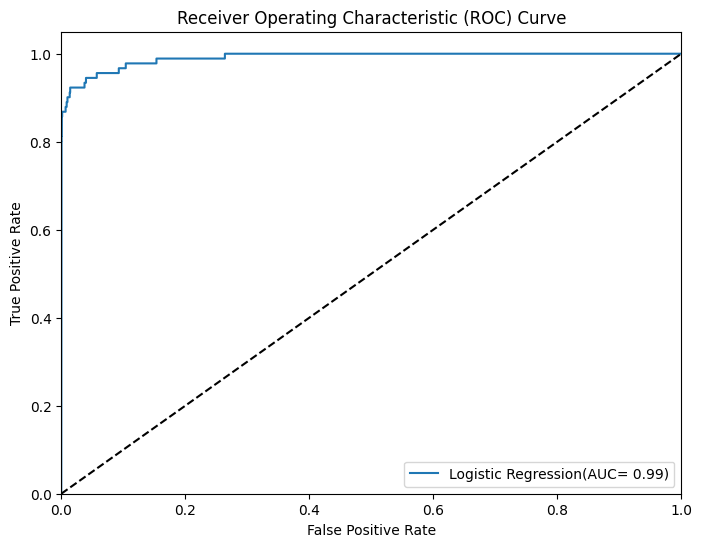

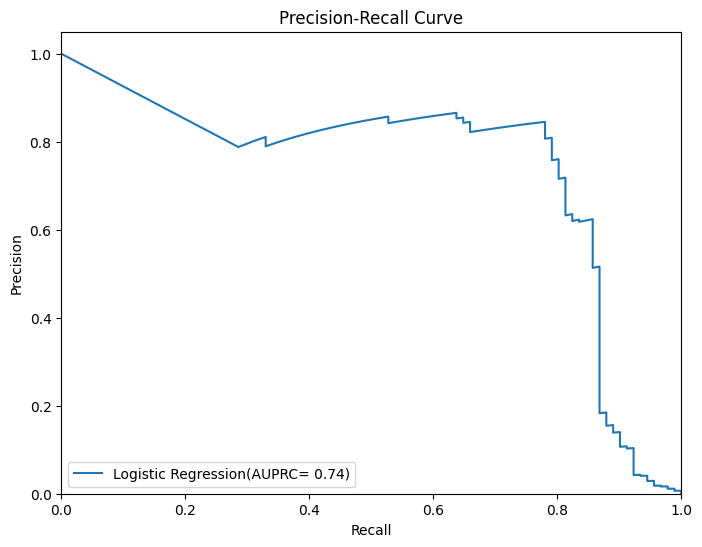

In [24]:
#plot the roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Logistic Regression(AUC= %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()

#Plot the precision-recall curve
plt.figure(figsize = (8,6))
plt.plot(recall, precision, label ="Logistic Regression(AUPRC= %0.2f)" % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc = "lower left")
plt.show()


### Decision Tree


In [25]:
import sklearn.tree

decision_tree = sklearn.tree.DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred_dt = decision_tree.predict(X_test)


In [27]:
print(classification_report(y_test, y_pred_dt))
print("AUC: ", roc_auc_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.48      0.78      0.59        91

    accuracy                           1.00     50581
   macro avg       0.74      0.89      0.80     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.8893473628767746


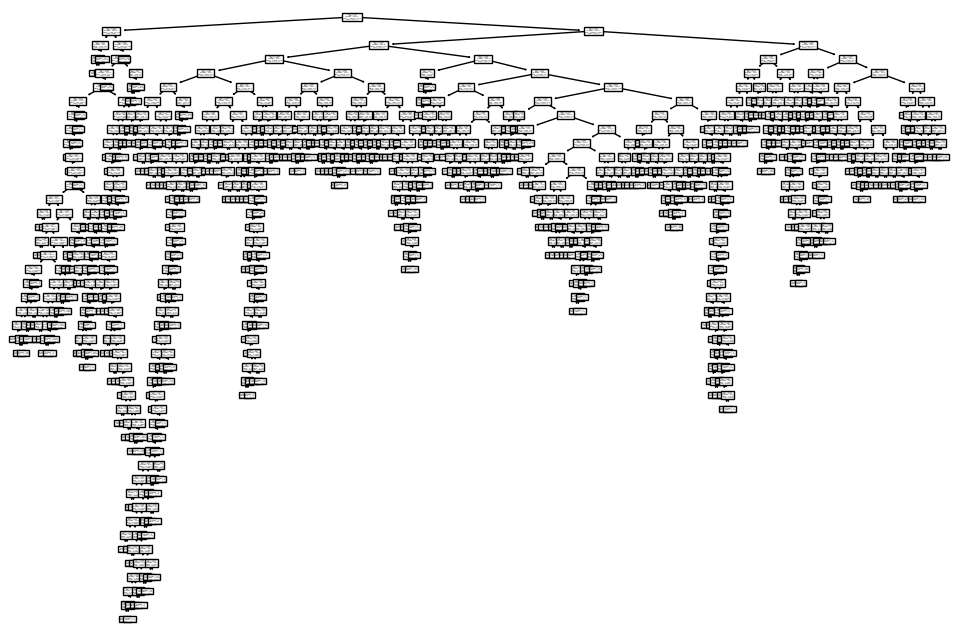

In [28]:
from sklearn.tree import plot_tree
feature_names = X.columns.tolist()
plt.figure(figsize=(12,8))
plot_tree(decision_tree, feature_names = feature_names,class_names= ['Genuine', 'Fraud'])
plt.show()

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier


In [30]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [31]:
y_pred_rf = random_forest.predict(X_test)


In [32]:
print(classification_report(y_test, y_pred_rf))
print("AUC: ", roc_auc_score(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.91      0.85      0.87        91

    accuracy                           1.00     50581
   macro avg       0.95      0.92      0.94     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.9229976994682878


In [33]:
#get feature importances from the random forest model
feature_importances = random_forest.feature_importances_


In [ ]:
#sort featue importances in descending order
sorted_indices = feature_importances.argsort()[: : -1]
sorted_importances =  feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

#plot the feature importances
plt.figure(figsize=(10,6))
plt.bar(range(len(feature_importances)), sorted_importances)

# species the angles at which the x-axis labels are rotated
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()




## Gradient Boosting Machines

In [35]:

from sklearn.ensemble import GradientBoostingClassifier


In [36]:
gbm = GradientBoostingClassifier(random_state = 42)
gbm.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [37]:
y_pred_gbm = gbm.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred_gbm))
print("AUC: ", roc_auc_score(y_test, y_pred_gbm))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     50490
           1       0.18      0.90      0.30        91

    accuracy                           0.99     50581
   macro avg       0.59      0.95      0.65     50581
weighted avg       1.00      0.99      0.99     50581

AUC:  0.9468160379925086


In [39]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [40]:
#Get the predicted probabilites for the positive class(fraud)
y_pred_prob_gbm = gbm.predict_proba(X_test)[:, 1]
#Compute the false positive rate, true positive rate, and threshold for the roc curve
fpr_gbm, tpr_gbm, thresholds_roc_gbm = roc_curve(y_test, y_pred_prob_gbm)
#Compute the Precision,recall and threshold for the Precision-recall curve
precision_gbm, recall_gbm, thresholds_pr_gbm = precision_recall_curve(y_test, y_pred_prob_gbm)
#Compute the area under the roc curve
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
#Compute the area under the precision-recall curve
pr_auc_gbm = auc(recall_gbm, precision_gbm)


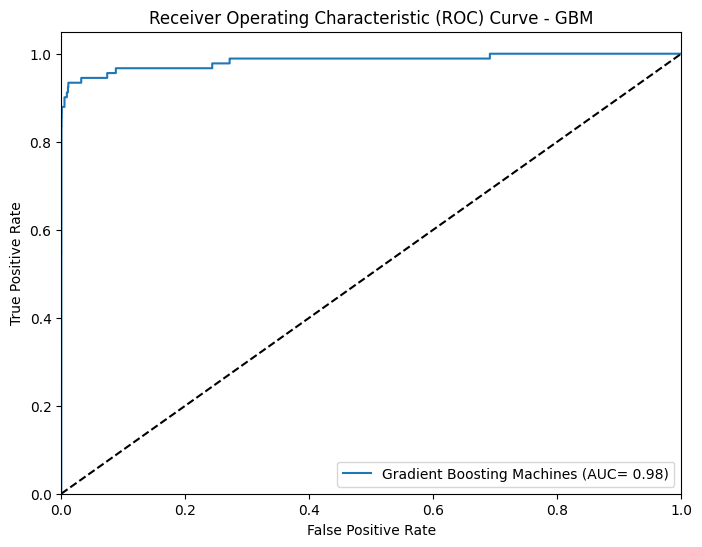

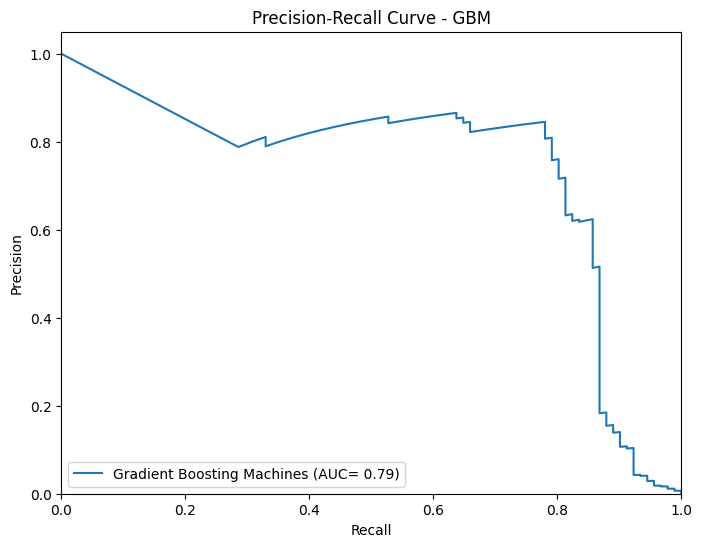

In [41]:
#plot the roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr_gbm, tpr_gbm, label="Gradient Boosting Machines (AUC= %0.2f)" % roc_auc_gbm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - GBM')
plt.legend(loc = "lower right")
plt.show()

#Plot the precision-recall curve
plt.figure(figsize = (8,6))
plt.plot(recall, precision, label ="Gradient Boosting Machines (AUC= %0.2f)" % pr_auc_gbm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - GBM')
plt.legend(loc = "lower left")
plt.show()

## Support Vector Machines


In [42]:
from sklearn.svm import SVC

In [43]:
svm = SVC(random_state = 42)
svm.fit(X_train_resampled, y_train_resampled)


SVC(random_state=42)

In [44]:
y_pred_svm = svm.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_svm))
print("AUC: ", roc_auc_score(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50490
           1       0.12      0.91      0.22        91

    accuracy                           0.99     50581
   macro avg       0.56      0.95      0.61     50581
weighted avg       1.00      0.99      0.99     50581

AUC:  0.950270535564653


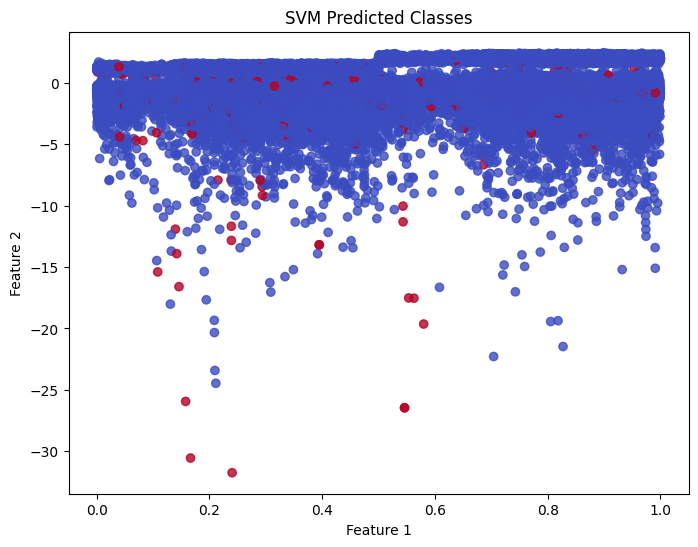

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#Extract the two features for visualization
X_vis = X_test.iloc[ :, :2].values

#Make predictions on the test data using the SVM model
y_pred_svm = svm.predict(X_test)

#Create a scatter plot of the predicted classes
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_pred_svm, cmap = 'coolwarm', alpha =0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Predicted Classes')
plt.show()

## Artificial Neural Networks

In [47]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from tensorflow import keras

In [49]:
from tensorflow.keras import layers

In [57]:
model = keras. Sequential([
    layers.Dense(64, activation= 'relu', input_shape= (X_train_resampled.shape[1],)),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(1, activation= 'sigmoid')
 ])
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=16)


Epoch 1/10
25252/25252 [==============================] - 39s 1ms/step - loss: 0.0117 - accuracy: 0.9967
Epoch 2/10
25252/25252 [==============================] - 37s 1ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 3/10
25252/25252 [==============================] - 34s 1ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 4/10
25252/25252 [==============================] - 32s 1ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 5/10
25252/25252 [==============================] - 37s 1ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 6/10
25252/25252 [==============================] - 35s 1ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 7/10
25252/25252 [==============================] - 45s 2ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 8/10
25252/25252 [==============================] - 38s 2ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 9/10
25252/25252 [==============================] - 39s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 10/10
25252/25252 [==============================

In [ ]:
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int)

In [ ]:
print(classification_report(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))


In [ ]:
from tensor flow import keras
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Train the model and capture the history
history = model.fit(X_train_resampled, y_train_resampled, epochs = 10, batch_size = 16)

#plot the training history
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.title('Training History')
plt.legend()
plt.show()


#Generate predictions
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int)

#Generate classification report and auc score
print(classification_report(y_test, y_pred_ann))
print("AUC: ", roc_auc_score(y_test, y_pred_ann))

#Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm, annot = True, fnt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Comparison and Selection

In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1-score, average_precision_score


In [ ]:
#create a data frame for model comparison
model_comparison= pd.DataFrame(columns=['Model', 'Precsion', 'Recall', 'F1-score', 'AUPRC'])


In [ ]:
#Logistic Regression
precison_lr = precison_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auprc_lr = average_precision_score(y_test, y_pred_lr)

model_comparison = model_comparison.append({'Model' : 'Logistic Regression',
                                            'Precsion' : precison_lr, 'Recall' : recall_lr, 'F1-score' : f1_lr,
                                            'AUPRC' : auprc_lr}, ignore_index = True)


In [ ]:
#Decison Trees
precison_dt = precison_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auprc_dt = average_precision_score(y_test, y_pred_dt)

model_comparison = model_comparison.append({'Model' : 'Decision Trees',
                                            'Precsion' : precison_dt, 'Recall' : recall_dt, 'F1-score' : f1_dt,
                                            'AUPRC' : auprc_dt}, ignore_index = True)


In [ ]:
#Random Forest
precison_rf = precison_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auprc_rf = average_precision_score(y_test, y_pred_rf)

model_comparison = model_comparison.append({'Model' : 'Random Forests',
                                            'Precsion' : precison_rf, 'Recall' : recall_rf, 'F1-score' : f1_rf,
                                            'AUPRC' : auprc_rf}, ignore_index = True)


In [ ]:
#Gradient Boosting Machines
precison_gbm = precison_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
auprc_gbm = average_precision_score(y_test, y_pred_gbm)

model_comparison = model_comparison.append({'Model' : 'Gradient Boosting Machines',
                                            'Precsion' : precison_gbm, 'Recall' : recall_gbm, 'F1-score' : f1_gbm,
                                            'AUPRC' : auprc_gbm}, ignore_index = True)


In [ ]:
#Support vector Machines
precison_svm = precison_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auprc_svm= average_precision_score(y_test, y_pred_svm)

model_comparison = model_comparison.append({'Model' : 'Gradient Boosting Machines',
                                            'Precsion' : precison_svm, 'Recall' : recall_svm, 'F1-score' : f1_svm,
                                            'AUPRC' : auprc_svm}, ignore_index = True)


In [ ]:
#Artificial Neural Networks
precison_ann = precison_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
auprc_ann= average_precision_score(y_test, y_pred_ann)

model_comparison = model_comparison.append({'Model' : 'Gradient Boosting Machines',
                                            'Precsion' : precison_ann, 'Recall' : recall_ann, 'F1-score' : f1_ann,
                                            'AUPRC' : auprc_ann}, ignore_index = True)


In [ ]:
#Sort the dataframe by AUPRC
model_comparison= model_comparison.sort_values(by = 'AUPRC', ascending = False)

#Print the model comparison table
print(model_comparison)

#Bar plot of AUPRC Scores
plt.figure(figsize = (10,6))
plt.bar(model_comparison['Model'], model_comparison['AUPRC'])
plot.xlabel['Model']
plot.ylabel['AUPRC']
plot.xticks(rotation = 45)
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1-score, average_precision_score

#Make predictions on the test data using the Random Forest Model
y_pred_test_rf = random_forest.predict(X_test)

#Calculate Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)2
recall_rf = recall_score(y_test, y_pred_rf) 
f1_rf = f1_score(y_test, y_pred_rf)
auprc_rf = average_precision_score(y_test, y_pred_rf)

#Print the evaluation metrics
print("Random Forest Model Evaluation: ")
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("f1: {:.4f}".format(f1_rf))
print("AUPRC: {:.4f}".format(AUPRC_rf))
